# Ex7: Kmeans clustering with scikit-learn + identify number of clusters
In this exercise we will run Kmeans using the <code>Kmeans</code> library in scikit-learn. In this case we are considering that there are 3 clusters.
> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

However, in unsupervised learning we do not know the answer. That's we don't know the true labels to evaluate the performance of our model. In the second part of the exercise we will try to answer the question on how to best select the number of clusters using both the <b>Elbow method</b> and the <b>Silhouette method</b>.

In [4]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load and visualiza the data

In [5]:
# Loading all data on a dictonary
data = loadmat('ex7data2.mat')

# Convert the data into a numpy array
X = data['X']

## Train the model

In [6]:
knn=KMeans(n_clusters=3)
knn.fit(X)

KMeans(n_clusters=3)

In [27]:
# This shows the centroid associated to each training datapoint
knn.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2])

## Plotting the result

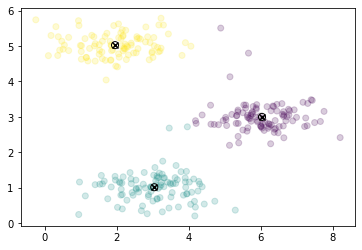

In [28]:
plt.scatter(X[:,0],X[:,1], marker='o', facecolors='none', c=knn.labels_, alpha=0.2)
#plt.plot(knn.centroids[:, :,0],knn.centroids[:, :,1], marker='x', c='Black')
plt.scatter(knn.cluster_centers_[:,0],knn.cluster_centers_[:,1], marker='x', c='Black')
plt.scatter(knn.cluster_centers_[:,0],knn.cluster_centers_[:,1], 
         s=50, 
         facecolors='none', 
         edgecolors='Black', 
         alpha=1)

# Finding the optimal number of clusters
> We will be using https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

## The Elbow method
The <b>Elbow method</b> uses the <b>Whithin Cluster Sum of Squared Errors, SSE or WSS</b> for different values of k. The idea behind is to identify the value of k where the SSE begins to decrease most rapidly. For this we plot these values.

<div class="alert alert-block alert-info"> <b>NOTE:</b> To calculate the SSE we will use the <code>inertia_</code> attribute. This is the sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided, which is called <b>distortion</b>. </div>

In [7]:
knn.inertia_

266.65851965491936

Note that the <code>KMeans</code> initialization has various parameters we didn't use above.

* <code>init='k-means++'</code>: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
* <code>n_init=10</code>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
* <code>max_iter=300</code>: Maximum number of iterations of the k-means algorithm for a single run.
* <code>random_state=0</code>: Determines random number generation for centroid initialization.

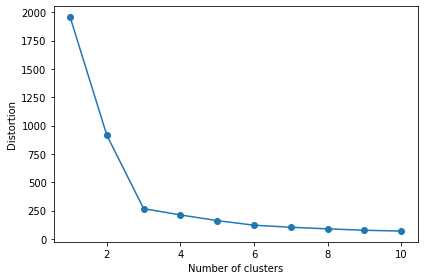

In [8]:
distortions=list()
for i in range (1,11):
    knn = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    knn.fit(X)
    distortions.append(knn.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> We see that the <i>elbow</i> is located at k=3. Therefore k=3 would be a good number of clusters.</div>

## The silhouette method
The Elbow method is not always as evident as in the previous example. 
The silhouette method, which can be used in combination with the Elbow method, measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The range of Silhouette is between -1 and +1. A <b>high value is desiderable</b>, that is, the point is located in the appropiate cluster. <b>If many points have a negative Silhouette value that means that either we have too many or too few clusters</b>.

We will be using the <code>silhouette_score</code> from <code>sklearn.metrics</code>

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

> https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

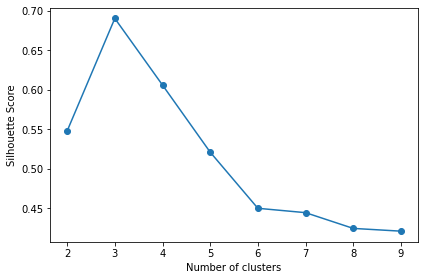

In [13]:
silValues = list()
Kmax=10

for i in range(2,Kmax):
    knn = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    knn.fit(X)
    silValues.append(silhouette_score(X, knn.labels_, metric='euclidean'))

plt.plot(range(2,Kmax), silValues, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"> We see that the <i>Silhouette Score</i> is maximized at k=3. Therefore k=3 would be a good number of clusters.</div>